In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [2]:
data = pd.read_csv(r'C:\Users\rutto\OneDrive\Desktop\fin_connect\fin_connect\ml\experiment\Finance_data.csv')
data.head()

,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Female,34,Yes,1,2,5,3,7,6,4,...,1-3 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines
1,Female,23,Yes,4,3,2,1,5,6,7,...,More than 5 years,Weekly,20%-30%,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants
2,Male,30,Yes,3,6,4,2,5,1,7,...,3-5 years,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television
3,Male,22,Yes,2,1,3,7,6,4,5,...,Less than 1 year,Daily,10%-20%,Equity,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet
4,Female,24,No,2,1,3,6,4,5,7,...,Less than 1 year,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet


In [3]:
data.columns

Index(['gender', 'age', 'Investment_Avenues', 'Mutual_Funds', 'Equity_Market',
       'Debentures', 'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold',
       'Stock_Marktet', 'Factor', 'Objective', 'Purpose', 'Duration',
       'Invest_Monitor', 'Expect', 'Avenue',
       'What are your savings objectives?', 'Reason_Equity', 'Reason_Mutual',
       'Reason_Bonds', 'Reason_FD', 'Source'],
      dtype='object')

In [4]:
columns_to_drop = [
    'Factor', 'Objective', 'Purpose', 'Invest_Monitor', 'Avenue', 
    'What are your savings objectives?', 'Reason_Equity', 
    'Reason_Mutual', 'Reason_Bonds', 'Reason_FD', 'Source'
]

data.drop(columns=columns_to_drop, inplace=True)

data.head()

,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,Stock_Marktet,Duration,Expect
0,Female,34,Yes,1,2,5,3,7,6,4,Yes,1-3 years,20%-30%
1,Female,23,Yes,4,3,2,1,5,6,7,No,More than 5 years,20%-30%
2,Male,30,Yes,3,6,4,2,5,1,7,Yes,3-5 years,20%-30%
3,Male,22,Yes,2,1,3,7,6,4,5,Yes,Less than 1 year,10%-20%
4,Female,24,No,2,1,3,6,4,5,7,No,Less than 1 year,20%-30%


In [6]:
data.columns

Index(['gender', 'age', 'Investment_Avenues', 'Mutual_Funds', 'Equity_Market',
       'Debentures', 'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold',
       'Stock_Marktet', 'Duration', 'Expect'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   gender              40 non-null     object
 1   age                 40 non-null     int64 
 2   Investment_Avenues  40 non-null     object
 3   Mutual_Funds        40 non-null     int64 
 4   Equity_Market       40 non-null     int64 
 5   Debentures          40 non-null     int64 
 6   Government_Bonds    40 non-null     int64 
 7   Fixed_Deposits      40 non-null     int64 
 8   PPF                 40 non-null     int64 
 9   Gold                40 non-null     int64 
 10  Stock_Marktet       40 non-null     object
 11  Duration            40 non-null     object
 12  Expect              40 non-null     object
dtypes: int64(8), object(5)
memory usage: 4.2+ KB


In [8]:
data.describe()

,age,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,27.800000,2.550000,3.475000,5.750000,4.650000,3.575000,2.025000,5.975000
std,3.560467,1.197219,1.131994,1.675617,1.369072,1.795828,1.609069,1.143263
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,25.750000,2.000000,3.000000,5.000000,4.000000,2.750000,1.000000,6.000000
50%,27.000000,2.000000,4.000000,6.500000,5.000000,3.500000,1.000000,6.000000
75%,30.000000,3.000000,4.000000,7.000000,5.000000,5.000000,2.250000,7.000000
max,35.000000,7.000000,6.000000,7.000000,7.000000,7.000000,6.000000,7.000000


In [9]:
data.isnull().sum()

gender                0
age                   0
Investment_Avenues    0
Mutual_Funds          0
Equity_Market         0
Debentures            0
Government_Bonds      0
Fixed_Deposits        0
PPF                   0
Gold                  0
Stock_Marktet         0
Duration              0
Expect                0
dtype: int64

In [11]:
data.shape

(40, 13)

In [12]:
# data segragation into numerical and categorical 

cat_columns = data.columns[data.dtypes =='object']
cat_columns

Index(['gender', 'Investment_Avenues', 'Stock_Marktet', 'Duration', 'Expect'], dtype='object')

In [13]:
num_columns = data.columns[data.dtypes!='object']
num_columns


Index(['age', 'Mutual_Funds', 'Equity_Market', 'Debentures',
       'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold'],
      dtype='object')

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'Mutual_Funds'}>,
        <Axes: title={'center': 'Equity_Market'}>],
       [<Axes: title={'center': 'Debentures'}>,
        <Axes: title={'center': 'Government_Bonds'}>,
        <Axes: title={'center': 'Fixed_Deposits'}>],
       [<Axes: title={'center': 'PPF'}>,
        <Axes: title={'center': 'Gold'}>, <Axes: >]], dtype=object)

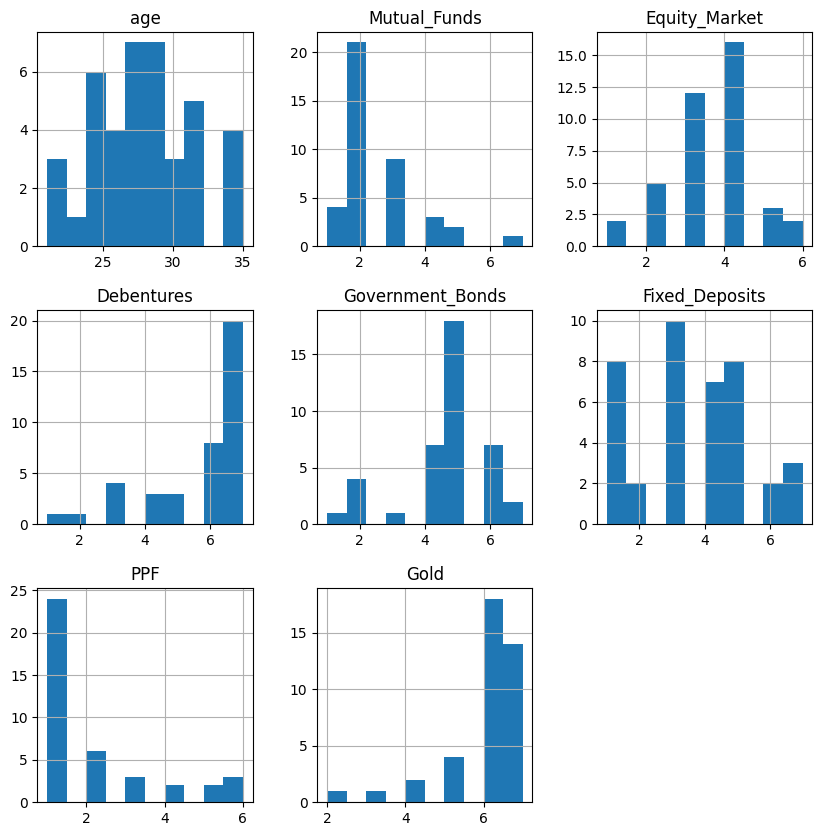

In [14]:
data[num_columns].hist(figsize=(10,10))

<Axes: >

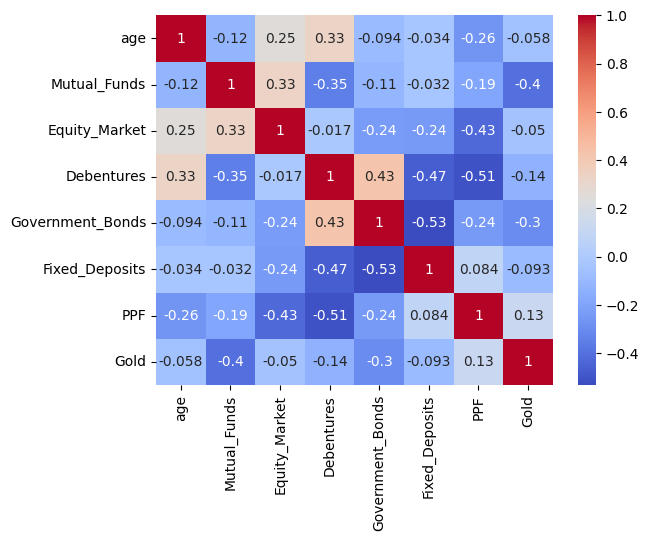

In [15]:
sns.heatmap(data[num_columns].corr(), annot=True, cmap='coolwarm')

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data['Investment_Avenues'] = label_encoder.fit_transform(data['Investment_Avenues'])
data['Stock_Marktet'] = label_encoder.fit_transform(data['Stock_Marktet'])

data = pd.get_dummies(data, columns=['Duration'], drop_first=True)

In [20]:
expect_mapping = {
    '20%-30%': 0.25,
    '10%-20%': 0.15,
    '30%-40%': 0.35
}
data['Expect'] = data['Expect'].map(expect_mapping)

In [21]:
X = data.drop('Expect', axis=1)  # Features (exclude 'Expect')
y = data['Expect']  # Target variable 'Expect

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mean Squared Error: 0.009647893536905972
R^2 Score: -7.820931233742607


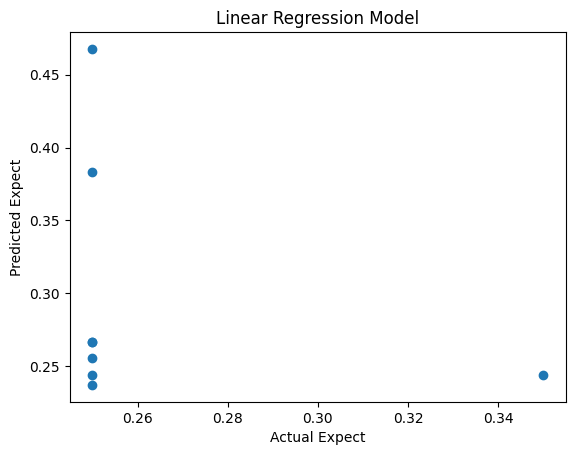

In [26]:
model = LinearRegression()

# Train the model

model.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot the predictions against the actual values

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Expect")
plt.ylabel("Predicted Expect")
plt.title("Linear Regression Model")
plt.show()